# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Probability theory
### VIDEO: Conditional probability
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## generate two long-spike time series

N = 10000
#binary sequence. Something like 1 for sunny day and 0 for rainy day. cpu clocks. Up down up down.
spikeDur  = 10  # a.u. but must be an even number
spikeNumA = .01 # in proportion of total number of points
spikeNumB = .05 # in proportion of total number of points. A lot more spikes compared to time series A

# initialize to zeros
spike_tsA = np.zeros(N)
spike_tsB = np.zeros(N)


### populate time series A
spiketimesA = np.random.randint(0,N,int(N*spikeNumA))

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesA)):
    
    # find boundaries
    #it's for places that we might have spikes very close to the boundaries
    bnd_pre = int( max(0,spiketimesA[spikei]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesA[spikei]+spikeDur/2) )
    
    # fill in with ones
    spike_tsA[bnd_pre:bnd_pst] = 1


# ### repeat for time series 2
spiketimesB = np.random.randint(0,N,int(N*spikeNumB))
# spiketimesB[:len(spiketimesA)] = spiketimesA # induce strong conditional probability

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesB)):
    
    # find boundaries
    bnd_pre = int( max(0,spiketimesB[spikei]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesB[spikei]+spikeDur/2) )
    
    # fill in with ones
    spike_tsB[bnd_pre:bnd_pst] = 1


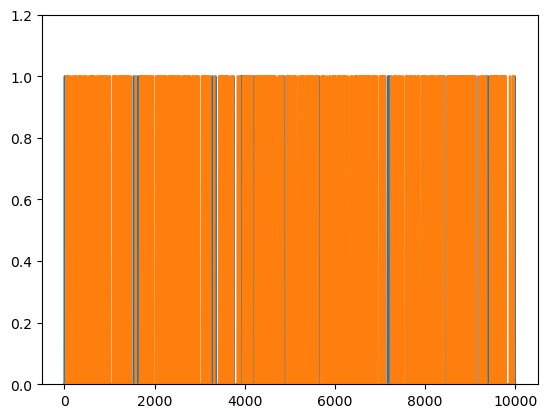

In [4]:
## let's see what they look like

plt.plot(range(N),spike_tsA, range(N),spike_tsB)
plt.ylim([0,1.2])
# plt.xlim([2000,2500])
plt.show()

In [6]:
## compute their probabilities and intersection

# probabilities
probA = sum(spike_tsA==1) / N
probB = np.mean(spike_tsB)

# joint probability
#in order for the probability to be ==2 means we have a spike in both channels
probAB = np.mean(spike_tsA+spike_tsB==2)

print(probA,probB,probAB)

0.0971 0.3975 0.039


In [7]:
## compute the conditional probabilities

# p(A|B)
pAgivenB = probAB/probB

# p(B|A)
pBgivenA = probAB/probA

# print a little report
print('P(A)   = %g'%probA)
print('P(A|B) = %g'%pAgivenB)
print('P(B)   = %g'%probB)
print('P(B|A) = %g'%pBgivenA)

P(A)   = 0.0971
P(A|B) = 0.0981132
P(B)   = 0.3975
P(B|A) = 0.401648
